In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv('C:/Users/signi/Downloads/Decision Model/iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data['species_label'], _ = pd.factorize(data['species'])
data['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [5]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species',
       'species_label'],
      dtype='object')

In [6]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
response = ['species_label']
X=data[features].values
y=data[response].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [8]:
X_train.shape

(112, 4)

In [9]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [110]:
# train the decision tree
dtree = tree.DecisionTreeClassifier( max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [111]:
y_pred = dtree.predict(X_test)

In [112]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.89


In [113]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



## Calculating accuracy for Train and Test data 

In [104]:
L1 = []
L2 = []
val_range = [2,5,10,15,20,30,50,100]

for i in val_range:
    dtree = tree.DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_train)
    y_predict = dtree.predict(X_test)
    L1.append(round(accuracy_score(y_train,y_pred),4))
    L2.append(round(accuracy_score(y_test,y_predict),4))
L_val = pd.concat([pd.Series(val_range),pd.Series(L1)], axis=1)
L1_val = pd.concat([pd.Series(val_range),pd.Series(L2)], axis=1)
L_val.columns = ['Depth','Accuracy']
L1_val.columns = ['Depth','Accuracy']
L_val.sort_values(by="Accuracy", ascending=False, inplace = True)
L1_val.sort_values(by="Accuracy", ascending=False, inplace = True)
print(L_val)
print('------------------------')
print(L1_val)

   Depth  Accuracy
1      5    1.0000
2     10    1.0000
3     15    1.0000
4     20    1.0000
5     30    1.0000
6     50    1.0000
7    100    1.0000
0      2    0.9643
------------------------
   Depth  Accuracy
1      5    0.9737
2     10    0.9737
3     15    0.9737
4     20    0.9737
5     30    0.9737
6     50    0.9737
7    100    0.9737
0      2    0.8947


## Plotting Accuracy for each Depth

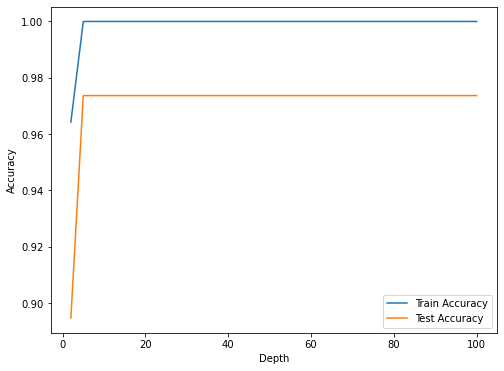

In [109]:

max_depth_list = [2,5,10,15,20,30,50,100]

train = [] # Log training errors for each model
test = [] # Log testing errors for each model

for x in max_depth_list:
    dtree = tree.DecisionTreeClassifier(max_depth=x) 
    dtree.fit(X_train,y_train)
    pred = dtree.predict(X_train)
    predict = dtree.predict(X_test)
    train.append(accuracy_score(y_train,pred))
    test.append(accuracy_score(y_test,predict))

plt.figure(figsize=(8,6))
plt.plot(max_depth_list, train, label='Train Accuracy') # Plot training error over domain
plt.plot(max_depth_list, test, label='Test Accuracy') # Plot testing error over domain
plt.xlabel('Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

## from the analysis, Dept 5 provides best accuracy for both train & test data 

In [114]:
dtree = tree.DecisionTreeClassifier( max_depth=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [115]:
y_pred = dtree.predict(X_train)

In [116]:
y_predict = dtree.predict(X_test)

In [117]:
accuracy = metrics.accuracy_score(y_train, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 1.00


In [118]:
accuracy1 = metrics.accuracy_score(y_test, y_predict)
print('Accuracy: {:.2f}'.format(accuracy1))

Accuracy: 0.97


In [119]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [120]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

